### Convolutional Neural Network Implementation from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Blues'
plt.rcParams['figure.figsize'] = (8.0,8.0) 
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
def zero_padding(X, pad):
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant', constant_values = (0,0))
    return X_pad

### Padding

x.shape =  (4, 3, 3, 2) 

x_pad.shape =  (4, 5, 5, 2) 

x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]] 

x_pad[1,1] =
 [[ 0.          0.        ]
 [ 0.04221375  0.58281521]
 [-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.          0.        ]]


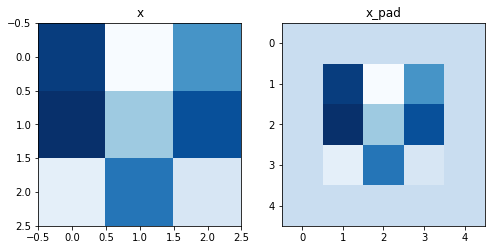

In [3]:
# Initialize random number generator
np.random.seed(1) 

# batch of 4 images of 3 x 3 x 2 dimension
x = np.random.randn(4, 3, 3, 2)

#function calling
x_pad = zero_padding(x, 1) 
print ("x.shape = ", x.shape,"\n")
print ("x_pad.shape = ", x_pad.shape,"\n")
print ("x[1,1] =\n", x[1, 1],"\n")
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])

axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
plt.show()

### Convolution operation 


In [4]:
def conv_single_step(A_prev_slice, W, b):  
    # Element-wise product between A_prev_slice and W.
    s = np.multiply(A_prev_slice , W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Added bias b to Z. 
    # squeeze -> 3d tensor to 2d tensor
    b = np.squeeze(b)
    Z = Z + b
    return Z

In [5]:
np.random.seed(1)
A_prev_slice = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(A_prev_slice, W, b)
print("Z =", Z)

Z = -6.999089450680221


### Forward Propagation

In [6]:
def conv_forward(A_prev, W, b, hparameters):
    (m, num_height_prev, num_width_prev, num_channel_prev) = A_prev.shape

    (f, f, num_channel_prev, num_channel) = W.shape
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    num_height = int((num_height_prev - f + 2*pad)/stride) + 1
    num_width = int((num_width_prev - f + 2*pad)/stride) + 1
    
    Z = np.zeros((m, num_height, num_width, num_channel))
    
    A_prev_pad = zero_padding(A_prev, pad)
    
    for i in range(m):              
        a_prev_pad = A_prev_pad[i]              
        for h in range(num_height):           
            vert_start = stride * h
            vert_end = vert_start + f
            
            for w in range(num_width):       
                horiz_start = stride * w
                horiz_end = horiz_start + f
                
                for c in range(num_channel):   
                                        
                    A_prev_slice = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] = conv_single_step(A_prev_slice,weights,biases)    
    return Z

In [7]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
print("Z's mean =\n", z_mean)
print("\nZ[0,2,1] =\n", z_0_2_1)


Z's mean =
 0.5511276474566768

Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]


## Pooling

In [8]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, num_height_prev, num_width_prev, num_channel_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    num_height = int(1 + (num_height_prev - f) / stride)
    num_width = int(1 + (num_width_prev - f) / stride)
    num_channel = num_channel_prev
    A = np.zeros((m, num_height, num_width, num_channel))              
    
    for i in range(m):                         
        temp_prev_slice = A_prev[i]
        for h in range(num_height): 
            vert_start = stride * h
            vert_end = vert_start + f
            
            for w in range(num_width):  
                horiz_start = stride * w
                horiz_end = horiz_start + f
                
                for c in range (num_channel): 
                    A_prev_slice =temp_prev_slice[vert_start:vert_end,horiz_start:horiz_end,c]

                    if mode == "max":
                        A[i, h, w, c] = np.max(A_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(A_prev_slice)    
    return A

In [9]:
# For Stride = 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("\nmode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])

mode = max
A.shape = (3, 3, 3)
A[1, 1] =
 [1.14472371 0.90159072 1.65980218]

mode = average
A.shape = (3, 3, 3)
A[1, 1] =
 [0.04737072 0.02592447 0.09203384]


In [10]:
# For Stride = 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 3)
A[0] =
 [[1.74481176 0.90159072 1.65980218]
 [1.74481176 1.6924546  1.65980218]]

mode = average
A.shape = (2, 2, 3)
A[1] =
 [[-0.38268052  0.23257995  0.6259979 ]
 [-0.09525515  0.268511    0.46605637]]


# Implementation 

### ConvNet to identify Sign language digits 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from CNN import *
np.random.seed(1)

In [12]:
# Loading the signs dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 3


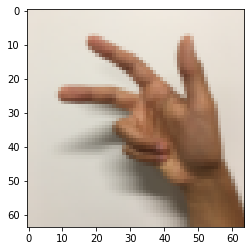

In [13]:
index = 100
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [14]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


#### Forward Propagation for the model:

   ##### CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE  

In [15]:
def convNet_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(filters = 8,kernel_size = 4,strides=1,padding = 'same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(strides=8, padding='same', pool_size=8)(A1)
    Z2 = tfl.Conv2D(filters = 16,kernel_size = 2,strides=1,padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(strides=4, padding='same', pool_size=4)(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6,activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [16]:
conv_model = convNet_model((64, 64, 3))
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 46ms/step - loss: 1.8255 - accuracy: 0.1667 - val_loss: 1.7955 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 1s 35ms/step - loss: 1.7940 - accuracy: 0.1648 - val_loss: 1.7933 - val_accuracy: 0.2000
Epoch 3/100
17/17 [==============================] - 1s 34ms/step - loss: 1.7923 - accuracy: 0.1685 - val_loss: 1.7917 - val_accuracy: 0.1667
Epoch 4/100
17/17 [==============================] - 1s 39ms/step - loss: 1.7900 - accuracy: 0.1722 - val_loss: 1.7878 - val_accuracy: 0.1167
Epoch 5/100
17/17 [==============================] - 1s 44ms/step - loss: 1.7851 - accuracy: 0.2259 - val_loss: 1.7842 - val_accuracy: 0.2083
Epoch 6/100
17/17 [==============================] - 1s 44ms/step - loss: 1.7791 - accuracy: 0.2306 - val_loss: 1.7782 - val_accuracy: 0.1833
Epoch 7/100
17/17 [==============================] - 1s 45ms/step - loss: 1.7707 - accuracy: 0.3111 - val_loss: 1.7703 - val_accuracy: 0.2750
Epoch 

17/17 [==============================] - 1s 37ms/step - loss: 0.7210 - accuracy: 0.7759 - val_loss: 0.7825 - val_accuracy: 0.7000
Epoch 59/100
17/17 [==============================] - 1s 45ms/step - loss: 0.7133 - accuracy: 0.7787 - val_loss: 0.7760 - val_accuracy: 0.7000
Epoch 60/100
17/17 [==============================] - 1s 40ms/step - loss: 0.7066 - accuracy: 0.7815 - val_loss: 0.7693 - val_accuracy: 0.7000
Epoch 61/100
17/17 [==============================] - 1s 40ms/step - loss: 0.6990 - accuracy: 0.7852 - val_loss: 0.7637 - val_accuracy: 0.7083
Epoch 62/100
17/17 [==============================] - 1s 39ms/step - loss: 0.6927 - accuracy: 0.7824 - val_loss: 0.7570 - val_accuracy: 0.7083
Epoch 63/100
17/17 [==============================] - 1s 51ms/step - loss: 0.6854 - accuracy: 0.7833 - val_loss: 0.7516 - val_accuracy: 0.7083
Epoch 64/100
17/17 [==============================] - 1s 48ms/step - loss: 0.6791 - accuracy: 0.7843 - val_loss: 0.7454 - val_accuracy: 0.7083
Epoch 65/100

In [18]:
history.history

{'loss': [1.8255070447921753,
  1.794019103050232,
  1.7922600507736206,
  1.7900253534317017,
  1.7850762605667114,
  1.7791301012039185,
  1.7707260847091675,
  1.7614636421203613,
  1.7501829862594604,
  1.7359579801559448,
  1.718066930770874,
  1.6953332424163818,
  1.6671961545944214,
  1.6320053339004517,
  1.5940057039260864,
  1.5534759759902954,
  1.510178804397583,
  1.4675817489624023,
  1.4244296550750732,
  1.387988567352295,
  1.348676323890686,
  1.3140696287155151,
  1.2825777530670166,
  1.2505916357040405,
  1.2207928895950317,
  1.191436529159546,
  1.165116310119629,
  1.1393455266952515,
  1.1137467622756958,
  1.0901761054992676,
  1.068477749824524,
  1.0461757183074951,
  1.0249881744384766,
  1.0054453611373901,
  0.9864470362663269,
  0.9689068794250488,
  0.9520480632781982,
  0.9360290765762329,
  0.9203451871871948,
  0.9071886539459229,
  0.8930919170379639,
  0.8793073296546936,
  0.8668051362037659,
  0.8553116321563721,
  0.8432214260101318,
  0.831272

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

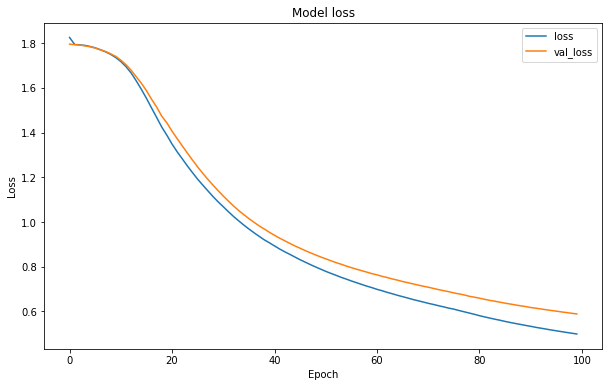

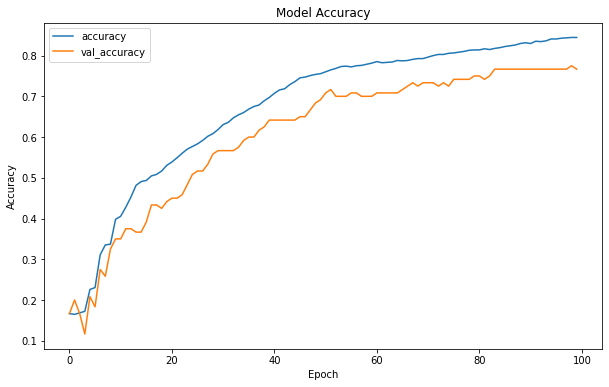

In [19]:
loss_acc_df = pd.DataFrame(history.history)
loss_df= loss_acc_df[['loss','val_loss']]
acc_df= loss_acc_df[['accuracy','val_accuracy']]
loss_df.plot(title='Model loss',figsize=(10,6)).set(xlabel='Epoch',ylabel='Loss')
acc_df.plot(title='Model Accuracy',figsize=(10,6)).set(xlabel='Epoch',ylabel='Accuracy')